[vào link cảu anh tiệp trước khi học ipynb này](https://machinelearningcoban.com/2017/01/27/logisticregression/)

# Tư tưởng xuất phát : 
    Một nhóm 20 sinh viên dành thời gian trong khoảng từ 0 đến 6 giờ cho việc ôn thi. Thời gian ôn thi này 
    
    ảnh hưởng đến xác suất sinh viên vượt qua kỳ thi như thế nào?
0.5 	0	 2.75	1
0.75	0	 3  	0
1   	0	 3.25	1
1.25	0	 3.5	0
1.5 	0	 4  	1
1.75	0	 4.25	1
1.75	1	 4.5	1
2   	0	 4.75	1
2.25	1	 5  	1
2.5 	0	 5.5	1
    
    Rõ ràng chúng ta thấy là không phải cứ học nhiều là sẽ đỗ, có những người học 3.5h vẫn trượt nhưng  
    những người 1,75h lại đỗ. Như vậy với mô hình tuyến tính PLA là không phù hợp. Vì không thể nói là  
    học trên mấy giời là chắc chắn đậu được. Chúng ta chỉ có thể thấy ràng càng học nhiều thì tỉ lệ  
    vượt qua kì thi càng cao như vậy khi cho một giờ học ta có thể dự đoán được là xác xuất trượt và  
    xác xuất vượt qua là bao nhiêu.

    Đầu ra sẽ là 0, 1 nên hàm phân chia có tính chất sau : ( ta có thể mô tả chúng trên đồ thị như hình  
    bên dưới)
    + Là hàm số liên tục nhận giá trị thực, bị chặn trong khoảng (0,1).
    + Nếu coi điểm có tung độ là 1/2làm điểm phân chia thì các điểm càng xa điểm này về phía bên trái 
    có giá trị càng gần 0.     Ngược lại, các điểm càng xa điểm này về phía phải có giá trị càng gần 1. 
    Điều này khớp với nhận xét rằng học càng nhiều thì xác suất đỗ càng cao và ngược lại.
    + Mượt (smooth) nên có đạo hàm mọi nơi, có thể được lợi trong việc tối ưu.
    

[[-4.07757562  1.50459709]]
[[0.03471414 0.04977775 0.07089785 0.10003558 0.1393523  0.19084472
  0.19084472 0.25571101 0.3335367  0.42163067 0.51501208 0.60735693
  0.69261323 0.76647522 0.8744414  0.91027212 0.93661893 0.95560681
  0.96909396 0.98519257]]
[[-4.092695  ]
 [ 1.55277242]]


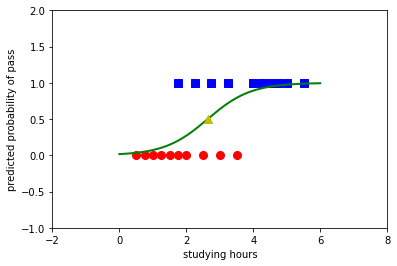

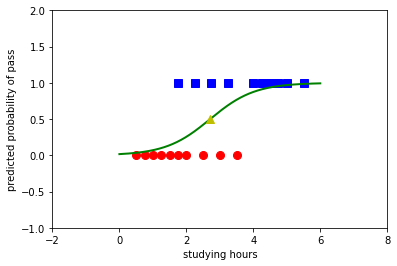

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
a = np.concatenate((np.ones((1, 20)), X), axis = 0)
a = a.T
l = LogisticRegression(C = 1e5,fit_intercept= False).fit(a,y)
print(l.coef_)
w = l.coef_
def sigmoid(s):
    return 1/(1 + np.exp(-s))
a = a.T
w = w.T
print(sigmoid(np.dot(w.T, a)))

'''
[[ 0.03281144  0.04694533  0.06674738  0.09407764  0.13102736  0.17961209
   0.17961209  0.24121129  0.31580406  0.40126557  0.49318368  0.58556493
   0.67229611  0.74866712  0.86263755  0.90117058  0.92977426  0.95055357
   0.96541314  0.98329067]]
'''
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])
# ------------------------------------------------------------

def display(w):
    X0 = X[1, np.where(y == 0)][0]
    y0 = y[np.where(y == 0)]
    X1 = X[1, np.where(y == 1)][0]
    y1 = y[np.where(y == 1)]

    plt.plot(X0, y0, 'ro', markersize = 8)
    plt.plot(X1, y1, 'bs', markersize = 8)

    xx = np.linspace(0, 6, 1000)
    w0 = w[-1][0][0]
    w1 = w[-1][1][0]
    threshold = -w0/w1
    yy = sigmoid(w0 + w1*xx)
    plt.axis([-2, 8, -1, 2])
    plt.plot(xx, yy, 'g-', linewidth = 2)
    plt.plot(threshold, .5, 'y^', markersize = 8)
    plt.xlabel('studying hours')
    plt.ylabel('predicted probability of pass')
    plt.show()
display(w)
w.append(l.coef_.T)
display(w)


# Hàm giúp mô tả phân sự chia bên trên (activation function)
* Sigmoid function
Trong đó hàm số có cả 3 tính chất nói trên : 

    f(s) = $\dfrac{1}{1 + e^{-s}}$
hàm này được chặn (0,1).

    f'(s) = f(s) * (1 - f(s))
* Tanh function
    
    tanh(s) = $\dfrac{e^s - e^{-s}}{e^s + e^{-s}}$
hàm này nhận giá trị trong (-1,1) nhưng có thể đưa về (0,1) 
    tanh(s) = 2σ(2s)−1 


    

Ap dụng cho bài phân biệt hoa bởi bộ dữ liệu IRIS

In [2]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn import neighbors, datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

cls = [[0],[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)

#Phân biệt hai loại hoa lan trong nhóm dữ liệu đã cho

def extract_data(X, y, cls): # chỉ lấy dữ liệu nhóm 1 và nhóm 2
    # Lấy vị trí các phần tử trong mảng mà có giá trị nhãn  = 0 và = 1
    y_res_id_zeros = []
    y_res_id_ones = []
    for i in range(len(y)):
        if y[i] == 1:
            y_res_id_ones.append(i)
        if y[i] == 0:
            y_res_id_zeros.append(i)
    n0 = len(y_res_id_zeros)
    n1 = len(y_res_id_ones)
    y_res_id = np.hstack((y_res_id_zeros,y_res_id_ones))
    X_res = X[y_res_id,:]
    y_res = np.asarray([0]*n0 + [1]*n1)
    return (X_res, y_res)
    
(Xtrain, ytrain) = extract_data(X_train, y_train, cls)
(Xtest, ytest) = extract_data(X_test, y_test, cls)

print ("Training size: %d" %len(ytrain))
print ("Test size    : %d" %len(ytest))

lr = LogisticRegression(C = 1e5,solver='liblinear').fit(Xtrain, ytrain)

lr_predict = lr.predict(Xtest)

print("XAC XUAT CHUAN XAC", 100* accuracy_score(ytest, lr_predict.tolist() ) )


lr = LogisticRegression(C = 1e5,solver='lbfgs', multi_class = 'multinomial' ).fit(X_train, y_train)
lr_predict = lr.predict(X_test)
print("XAC XUAT CHUAN XAC", 100* accuracy_score(y_test, lr_predict.tolist() ) )


Training size: 67
Test size    : 33
XAC XUAT CHUAN XAC 100.0
XAC XUAT CHUAN XAC 100.0
/home/thinh-do/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
